In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/Tim/PycharmProjects/HOI/')

In [3]:
import sys
sys.path

['/Users/tim/PycharmProjects/HOI/examples',
 '/Users/tim/opt/anaconda3/lib/python39.zip',
 '/Users/tim/opt/anaconda3/lib/python3.9',
 '/Users/tim/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/tim/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/tim/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/Tim/PycharmProjects/HOI/']

In [4]:
import os
os.getcwd()

'/Users/tim/PycharmProjects/HOI/examples'

In [5]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [33]:
from synthetic_data import stationary_pb_ts, nonstationary_ts_n, stationary_pb_ts_n
from HOI.preprocessings import compute_kernel, compute_kernel_n
from HOI.tests import test_independence, permutation

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_cor(data, mode):
    x = np.arange(0.1, 1, 0.05)
    y = np.array(data)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    # ax.set_ylim(0, 1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode)
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

In [9]:
from HOI.normalisation import dHcor2_std, dHcor2_norm

In [10]:
def plot_test(data, mode):
    x = np.arange(0.1, 1, 0.1)
    y = np.array(data)

    fig = plt.figure(dpi=800)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode + ' of dHSIC independence tests')
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

# time * variables

In [29]:
df = stationary_pb_ts(t_time = 1200, d = 0.3, mode = "case1", a=0.5)
data_dict, kernel_dict = compute_kernel(df)
stat, cv, pval, reject = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']],
                                 [data_dict['d1'], data_dict['d2'], data_dict['d3']],
                                  mode = 'stat_ts', n_perms=5000, alpha=0.05)
print(stat, cv, pval, reject)

0.0005814109029103065 0.0006139352964656952 0.07398520295940812 0


In [31]:
# all pairwise independent but jointly dependent
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = stationary_pb_ts(t_time = 300, d = d, mode = "case1", a=0.5)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']],
                                         [data_dict['d1'], data_dict['d2'], data_dict['d3']],
                                          mode = 'stat_ts', n_perms=5000, alpha=0.05)
        rejects = rejects + reject
    power[str(d)] = rejects/100
print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.013333333333333334, '0.2': 0.02666666666666667, '0.30000000000000004': 0.06333333333333334, '0.4': 0.09, '0.5': 0.11333333333333333, '0.6': 0.22666666666666666, '0.7000000000000001': 0.23666666666666666, '0.8': 0.29333333333333333, '0.9': 0.31}


In [36]:
# new_values by right shifts
power = {'0.1': 0.03, 
         '0.2': 0.08, 
         '0.30000000000000004': 0.19, 
         '0.4': 0.27, 
         '0.5': 0.34, 
         '0.6': 0.68, 
         '0.7000000000000001': 0.71, 
         '0.8': 0.88, 
         '0.9': 0.93}

In [ ]:
# power1 = {'0.1': 0.34,
#  '0.2': 0.31,
#  '0.30000000000000004': 0.47,
#  '0.4': 0.49,
#  '0.5': 0.62,
#  '0.6': 0.71,
#  '0.7000000000000001': 0.72,
#  '0.8': 0.79,
#  '0.9': 0.87}

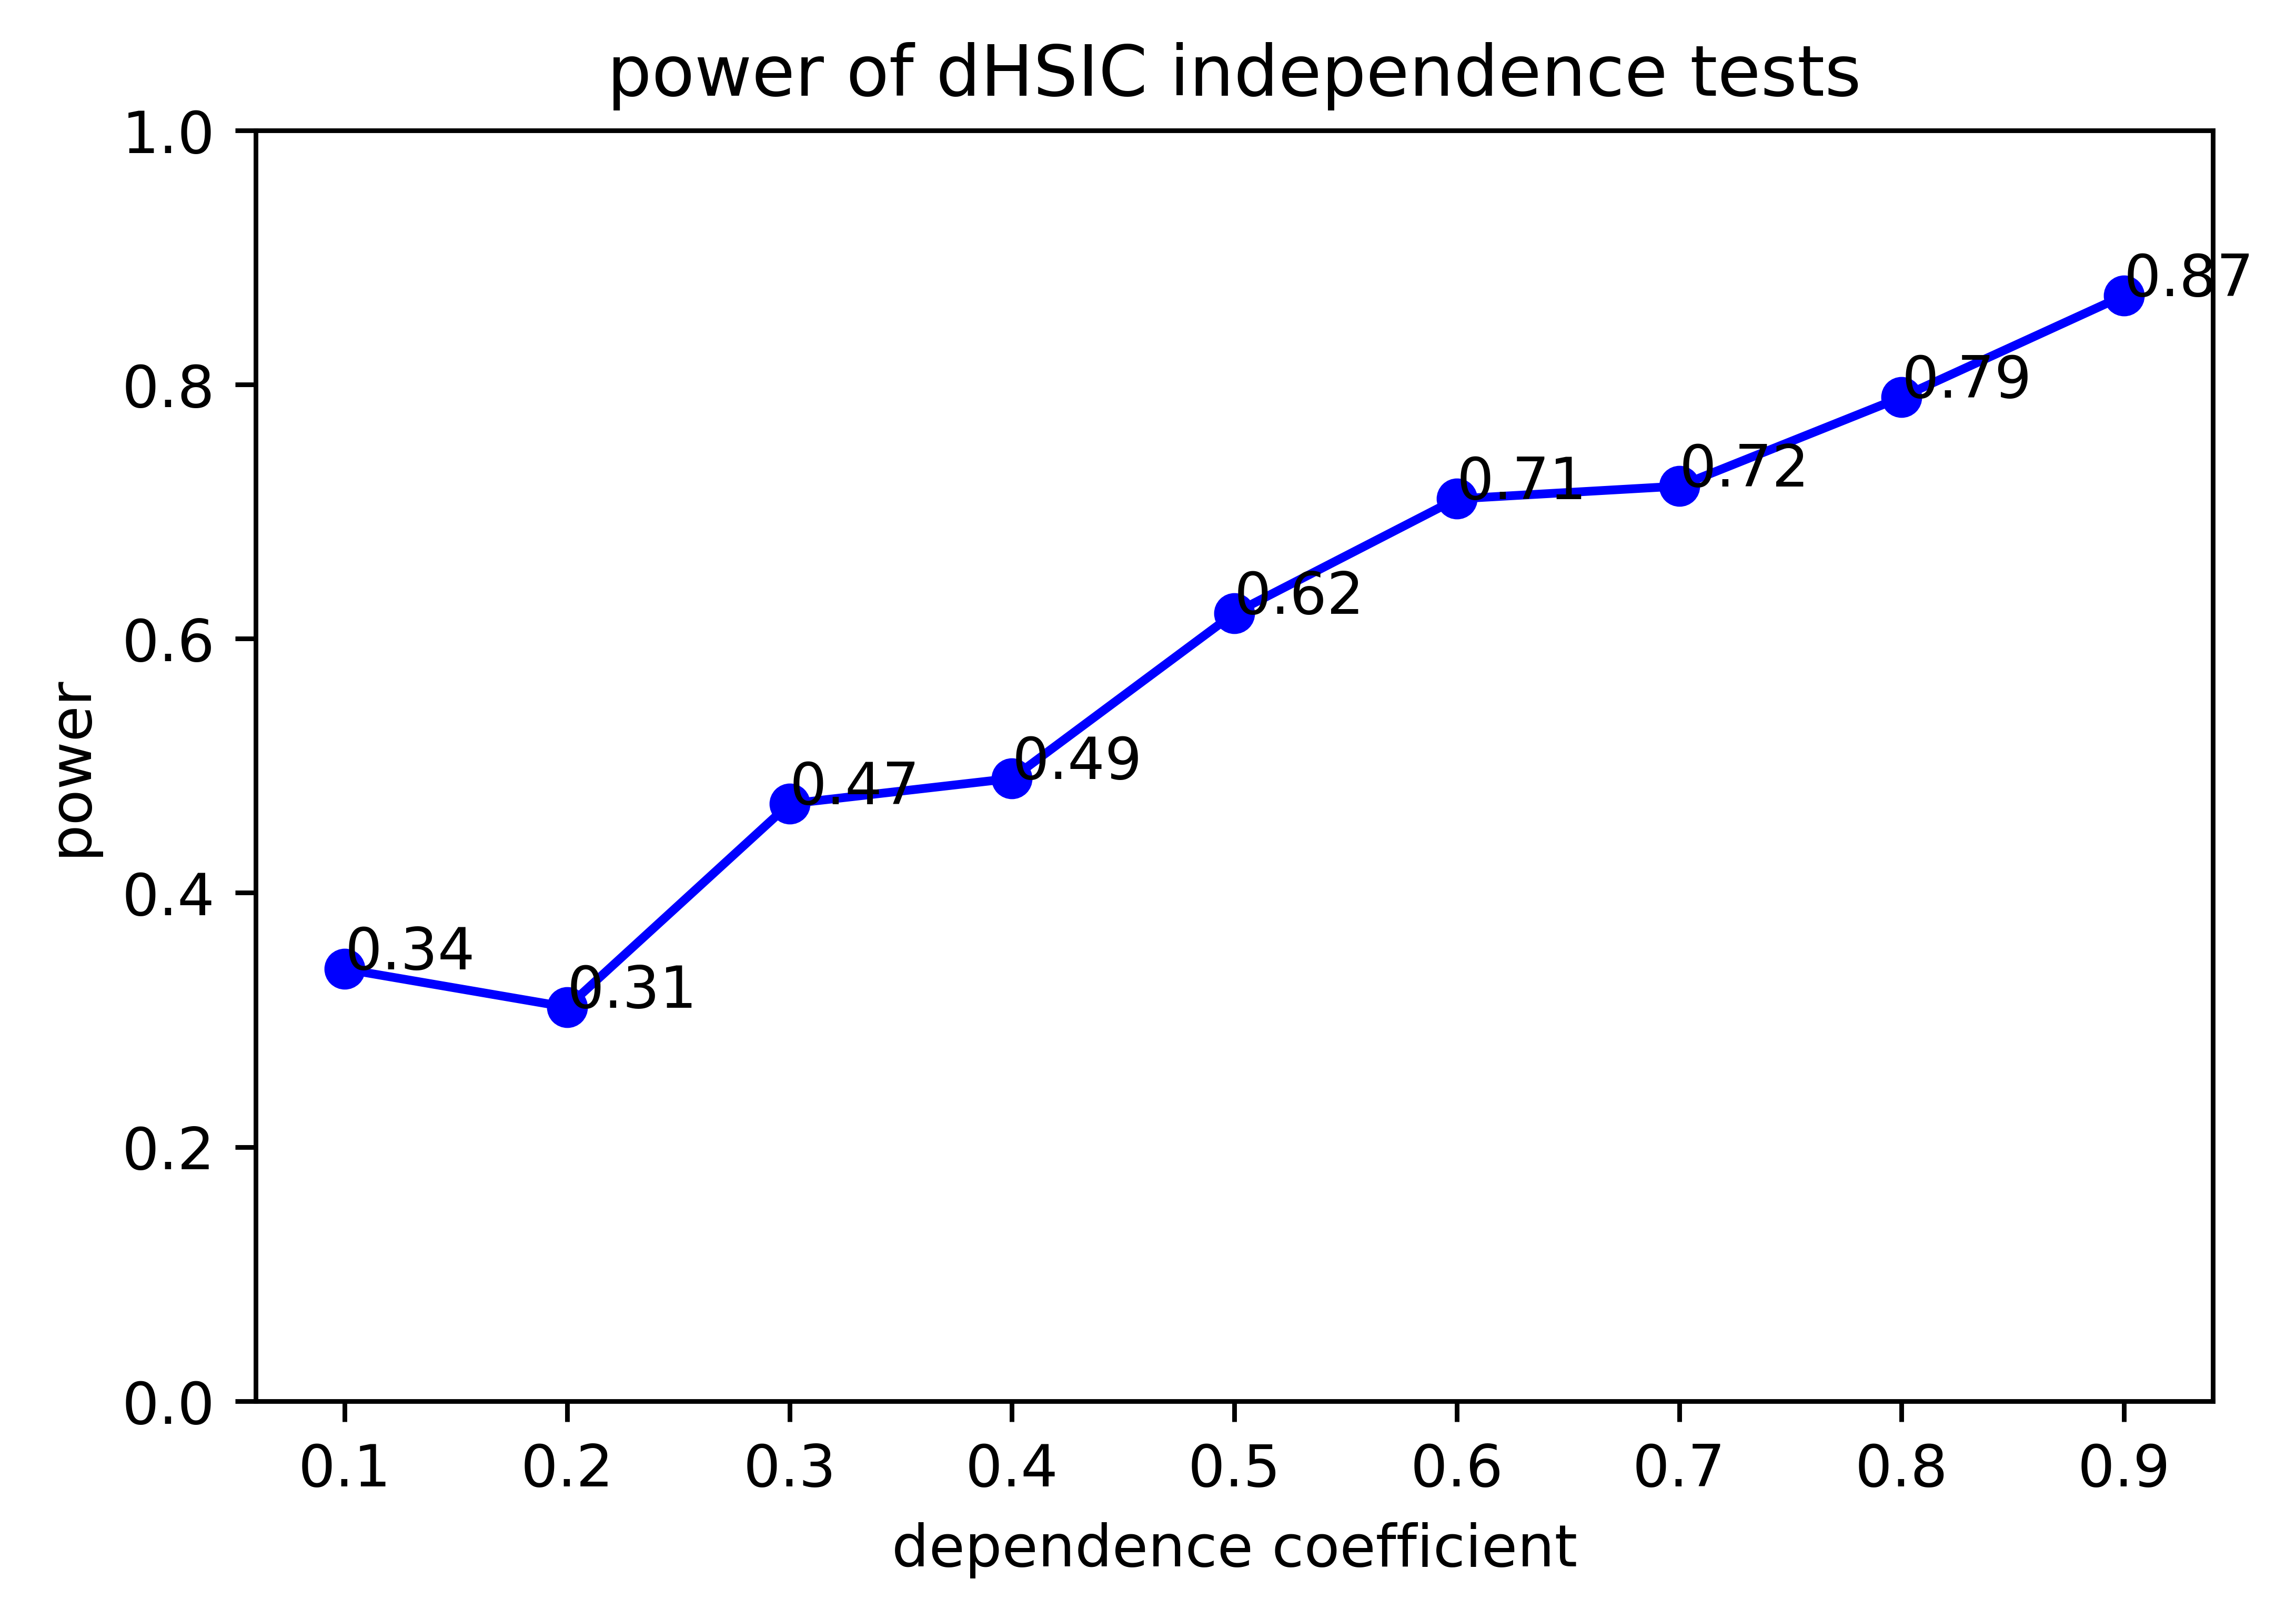

In [77]:
plot_test(list(power1.values()), 'power')

In [ ]:
# 100% better than 3-way HSIC, comparable with lancaster test from paulr

In [40]:
 # 2 pairwise dependent, xy pairwise independent and jointly dependent
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = stationary_pb_ts(t_time = 300, d = d, mode = "case2", a=0.5)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject_1 = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']],
                                         [data_dict['d1'], data_dict['d2'], data_dict['d3']],
                                          mode = 'stat_ts', n_perms=5000, alpha=0.05)
        _, _, _, reject_2 = test_independence([kernel_dict['d1'], kernel_dict['d3']],
                                         [data_dict['d1'], data_dict['d3']],
                                          mode = 'stat_ts', n_perms=5000, alpha=0.05)
        rejects = rejects + reject_1 + reject_2 * 2
    power[str(d)] = rejects/300

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [43]:
# new power with shifted time series
# power = {'0.1': 0.38,
#  '0.2': 0.75,
#  '0.3': 0.98,
#  '0.4': 1.0,
#  '0.5': 1.0,
#  '0.6': 1.0,
#  '0.7': 1.0,
#  '0.8': 1.0,
#  '0.9': 1.0}

In [48]:
power2 = {'0.1': 0.32,
 '0.2': 0.45,
 '0.3': 0.67,
 '0.4': 0.84,
 '0.5': 0.88,
 '0.6': 0.90,
 '0.7': 0.93,
 '0.8': 0.97,
 '0.9': 0.98}

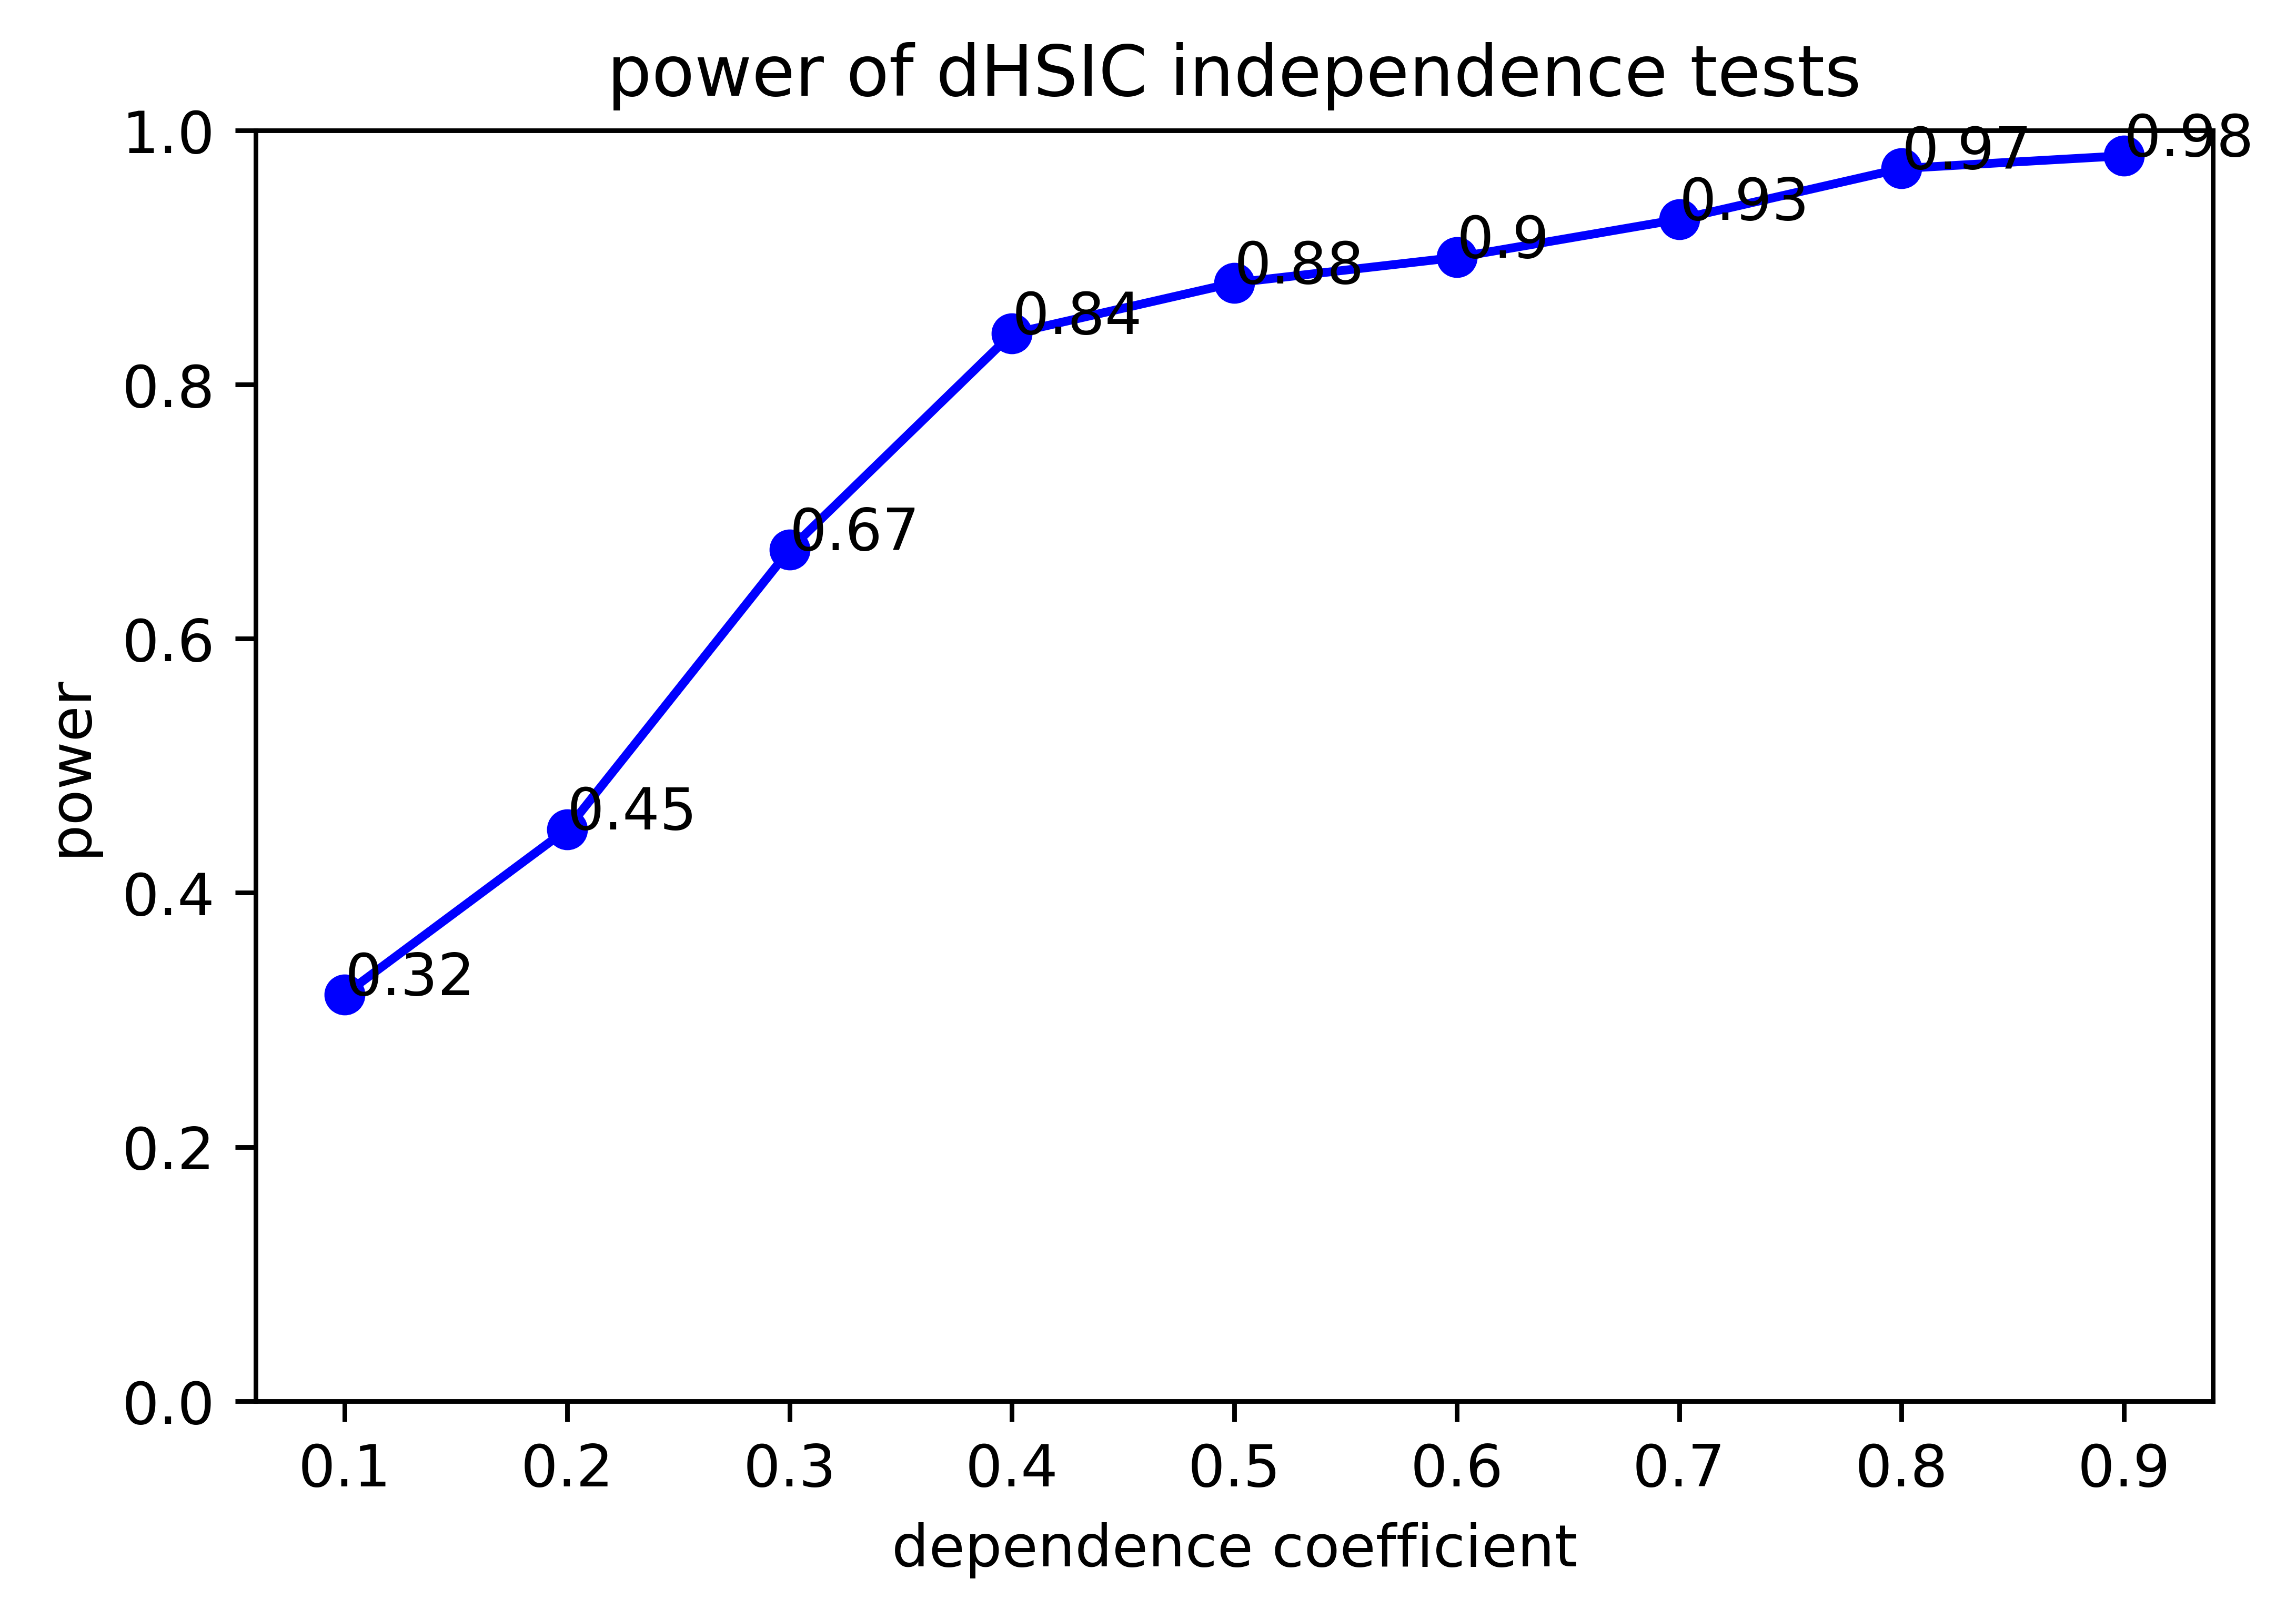

In [78]:
plot_test(list(power2.values()), 'power')

In [37]:
# all independent
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = stationary_pb_ts(t_time = 300, d = 0, mode = "case3", a=d)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject_1 = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']],
                                         [data_dict['d1'], data_dict['d2'], data_dict['d3']],
                                          mode = 'stat_ts', n_perms=5000, alpha=0.05)
        _, _, _, reject_2 = test_independence([kernel_dict['d1'], kernel_dict['d3']],
                                         [data_dict['d1'], data_dict['d3']],
                                          mode = 'stat_ts', n_perms=5000, alpha=0.05)
        
        rejects = rejects + reject_1 + reject_2 * 3
    power[str(d)] = rejects/400
    print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.0425}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.0425, '0.30000000000000004': 0.065}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.0425, '0.30000000000000004': 0.065, '0.4': 0.045}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.0425, '0.30000000000000004': 0.065, '0.4': 0.045, '0.5': 0.0675}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.0425, '0.30000000000000004': 0.065, '0.4': 0.045, '0.5': 0.0675, '0.6': 0.065}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.0425, '0.30000000000000004': 0.065, '0.4': 0.045, '0.5': 0.0675, '0.6': 0.065, '0.7000000000000001': 0.09}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.0425, '0.30000000000000004': 0.065, '0.4': 0.045, '0.5': 0.0675, '0.6': 0.065, '0.7000000000000001': 0.09, '0.8': 0.0475}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.0425, '0.30000000000000004': 0.065, '0.4': 0.045, '0.5': 0.0675, '0.6': 0.065, '0.7000000000000001': 0.09, '0.8': 0.0475, '0.9': 0.08}


In [39]:
# better than last time
# power = {'0.1': 0.05, 
#          '0.2': 0.0425, 
#          '0.3': 0.065, 
#          '0.4': 0.045, 
#          '0.5': 0.0675, 
#          '0.6': 0.065, 
#          '0.7': 0.09, 
#          '0.8': 0.0475, 
#          '0.9': 0.08}

In [52]:
power3 = [0.17  , 0.17, 0.15  , 0.13  , 0.23  , 0.22, 0.21  , 0.23, 0.31  ]

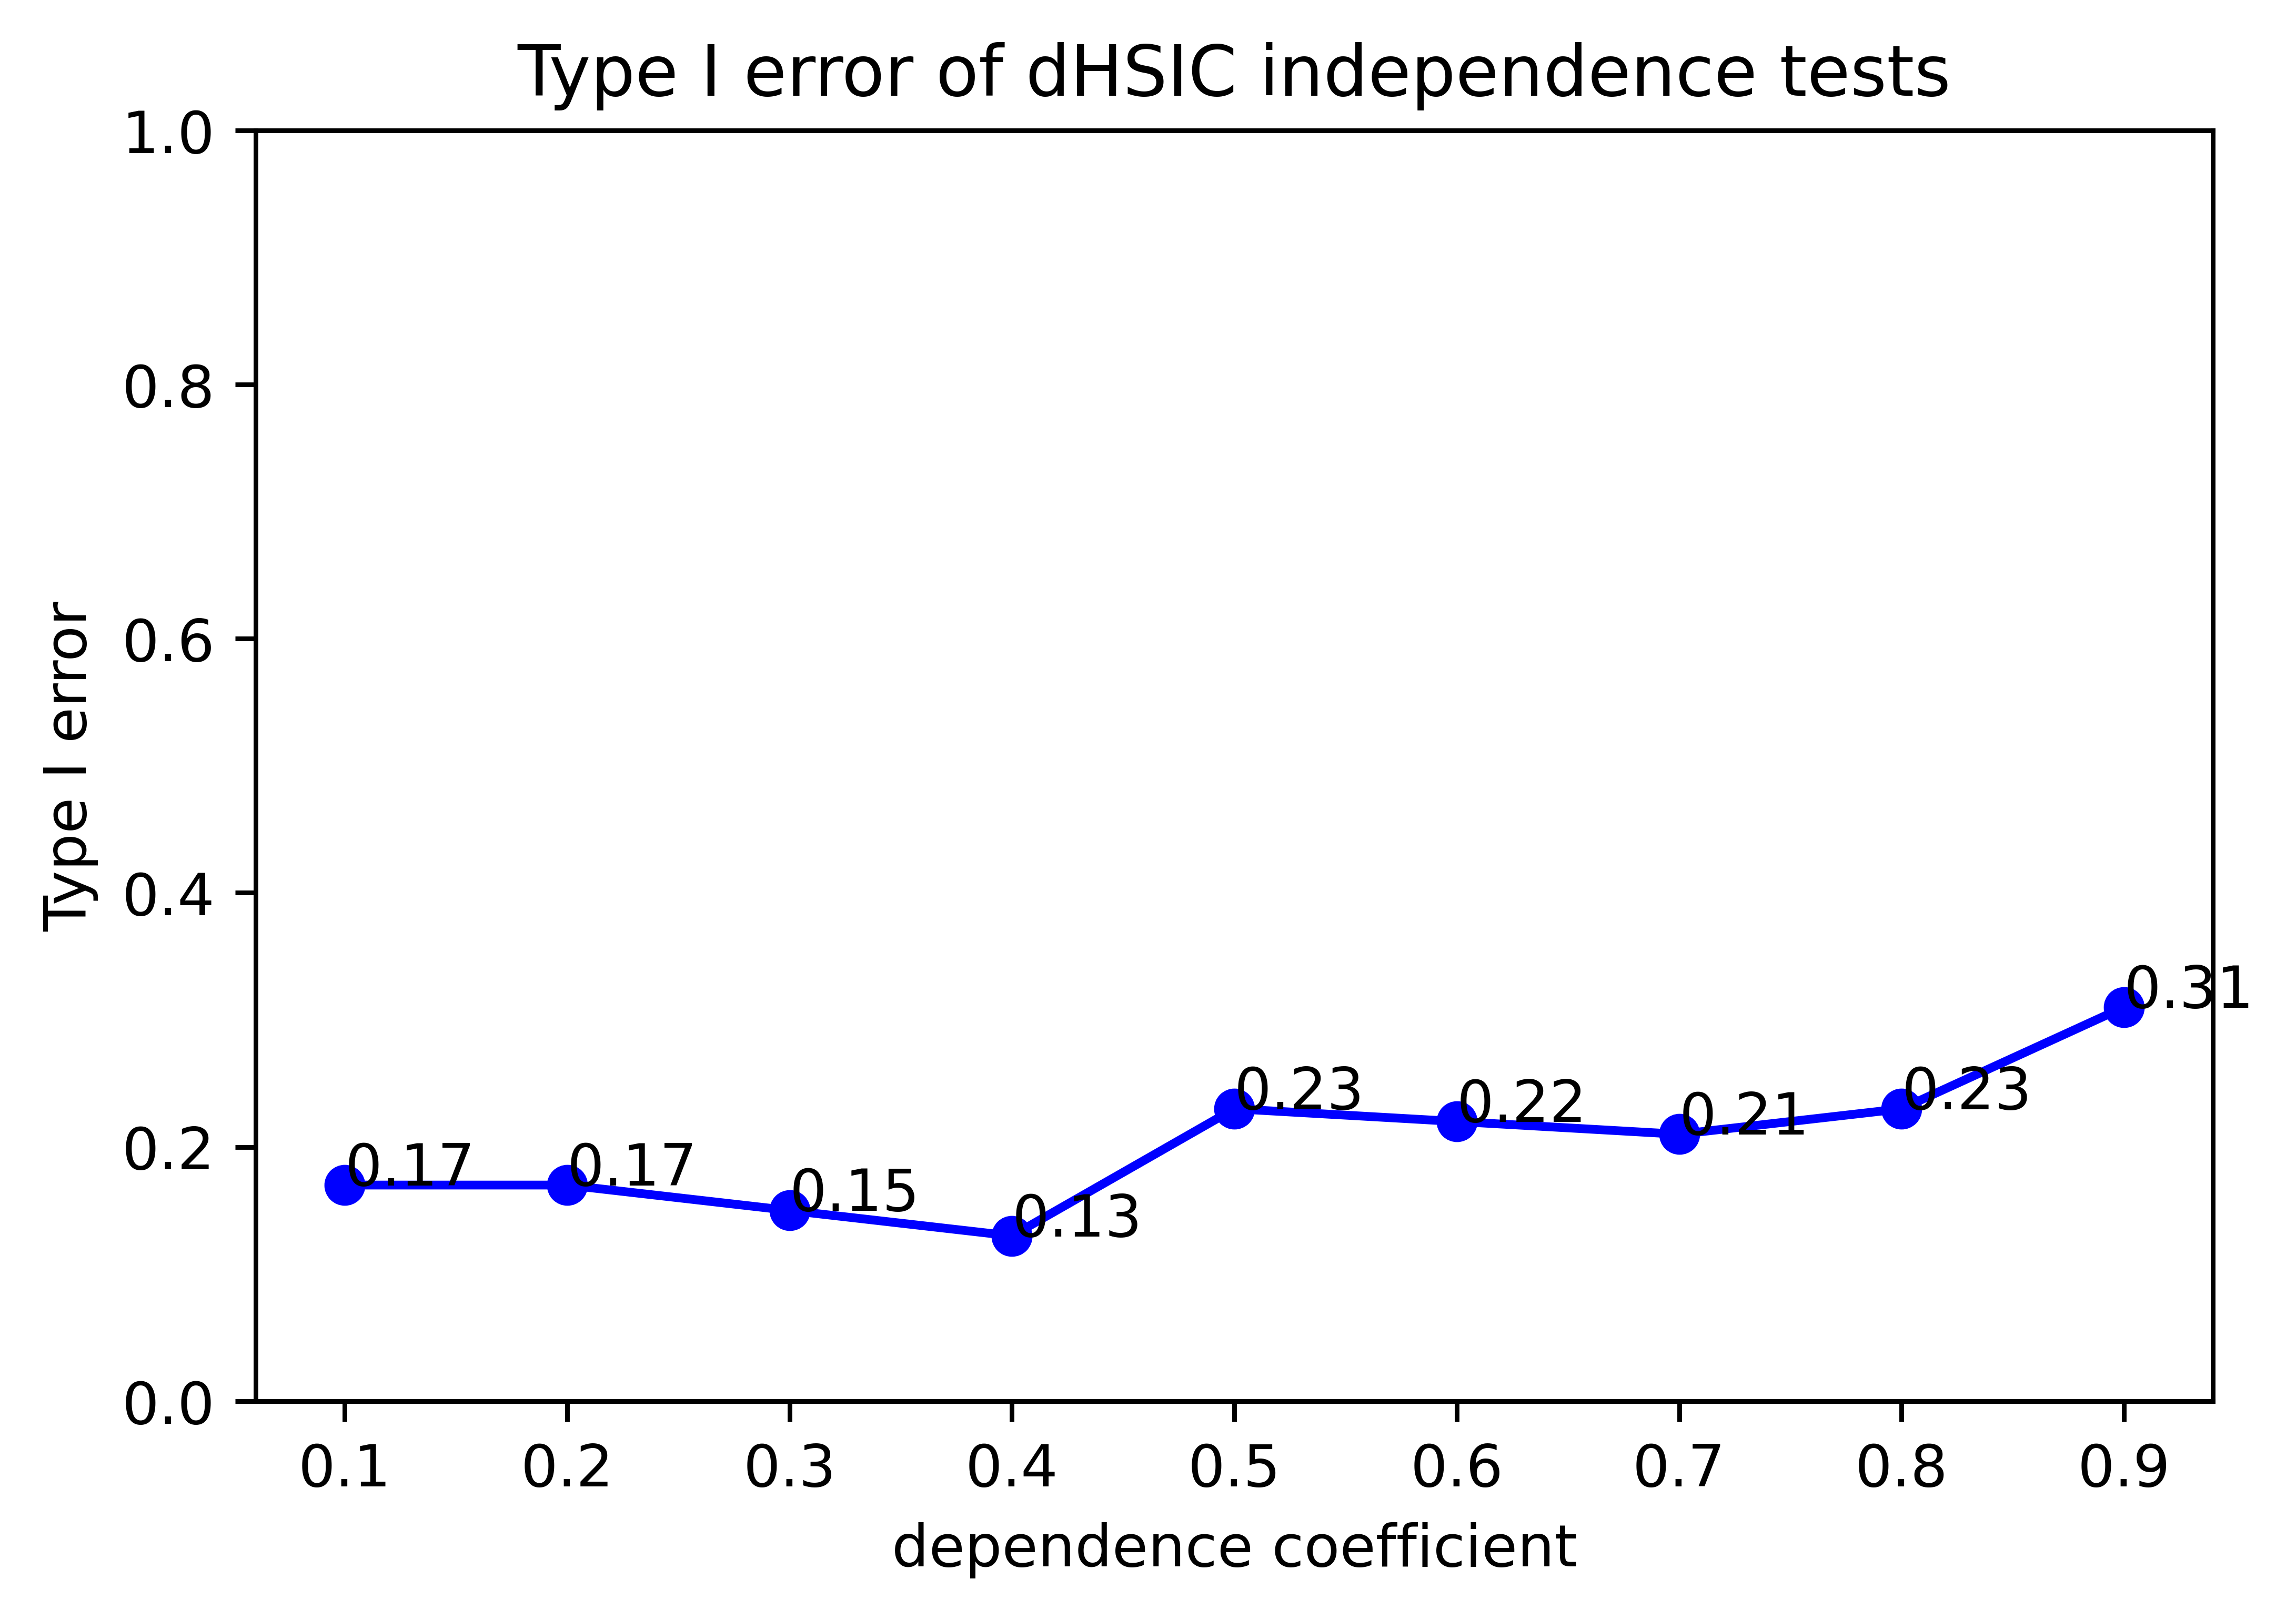

In [79]:
plot_test(power3, 'Type I error')

# time * variable * n_sample

In [8]:
d1, d2, d3 = stationary_pb_ts_n(n_sample = 300, t_time = 30, d = 0.9, mode = "case1", a=0.5)

In [43]:
rejects = 0
for i in tqdm(np.arange(100)):
    d1, d2, d3 = stationary_pb_ts_n(n_sample = 100, t_time = 10, d = 0.2, mode = "case1", a=0.5)
    k1 = compute_kernel_n(d1)
    k2 = compute_kernel_n(d2)
    k3 = compute_kernel_n(d3)
    _, _, _, reject_1 = test_independence([k1,k2,k3], None, mode = 'iid', n_perms=5000, alpha=0.05)

    rejects = rejects + reject_1
    
print(rejects)

  0%|          | 0/100 [00:00<?, ?it/s]

42


In [12]:
k1 = compute_kernel_n(d1)
k2 = compute_kernel_n(d2)
k3 = compute_kernel_n(d3)

In [13]:
_, _, _, reject_1 = test_independence([k1,k2,k3], None, mode = 'iid', n_perms=5000, alpha=0.05)
_, _, _, reject_2 = test_independence([k1,k2], None, mode = 'iid', n_perms=5000, alpha=0.05)

In [14]:
reject_1, reject_2

(0, 0)

In [9]:
power ={}
for d in tqdm(np.arange(0.7, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(200)):
        d1, d2, d3 = stationary_pb_ts_n(n_sample = 300, t_time = 30, d = d, mode = "case1", a=0.5)
        k1 = compute_kernel_n(d1)
        k2 = compute_kernel_n(d2)
        k3 = compute_kernel_n(d3)
        _, _, _, reject_1 = test_independence([k1,k2,k3], None, mode = 'iid', n_perms=2000, alpha=0.05)
        
        rejects = rejects + reject_1
    power[str(d)] = rejects/200
    print(power)

print(power)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'0.7': 0.145}


  0%|          | 0/200 [00:00<?, ?it/s]

{'0.7': 0.145, '0.7999999999999999': 0.13}


  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

# frequency mixing data

In [175]:
df = pd.read_csv ('dependence_phases.csv',header=None)

In [176]:
d1 = np.array(df.iloc[0])
d2 = np.array(df.iloc[1])
d3 = np.array(df.iloc[2])
d4 = np.array(df.iloc[3])

df = pd.DataFrame(list(zip(d1[:1000], d2[:1000], d3[:1000], d4[:1000])), columns=['d1', 'd2', 'd3', 'd4'])

In [177]:
data_dict, kernel_dict = compute_kernel(df)

In [178]:
rejects = 0
for i in tqdm(np.arange(20)):
    _, _, _, reject = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d4']],
                                     [data_dict['d1'], data_dict['d2'], data_dict['d4']],
                                      mode = 'stat_ts', n_perms=5000, alpha=0.05)
    rejects = rejects + reject
print(rejects)

  0%|          | 0/20 [00:00<?, ?it/s]

20


In [103]:
rejects = 0
for i in tqdm(np.arange(100)):
    _, _, _, reject = test_independence([kernel_dict['d4'], kernel_dict['d2'], kernel_dict['d3']],
                                     [data_dict['d4'], data_dict['d2'], data_dict['d3']],
                                      mode = 'stat_ts', n_perms=5000, alpha=0.05)
    rejects = rejects + reject
print(rejects)

  0%|          | 0/100 [00:00<?, ?it/s]

100


## multiple realisation

In [104]:
import scipy.io
mat = scipy.io.loadmat('multiple_samples_dependence.mat')

In [110]:
mat['all_samples'].shape

(80, 4, 3000)

In [173]:
md1 = mat['all_samples'][:,0,:][:,0:335]
md2 = mat['all_samples'][:,1,:][:,0:335]
md3 = mat['all_samples'][:,2,:][:,0:335]
md4 = mat['all_samples'][:,3,:][:,0:335]

kmd1 = compute_kernel_n(md1)
kmd2 = compute_kernel_n(md2)
kmd3 = compute_kernel_n(md3)
kmd4 = compute_kernel_n(md4)

In [171]:
md1.shape

(80, 340)

In [174]:
rejects = 0
for i in tqdm(np.arange(100)):
    _, _, _, reject = test_independence([kmd1, kmd2, kmd4],None,
                                      mode = 'iid', n_perms=5000, alpha=0.05)
    rejects = rejects + reject
print(rejects)

  0%|          | 0/100 [00:00<?, ?it/s]

41


# normalisation

In [39]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = stationary_pb_ts(t_time = 300, d = s, mode = "case1", a=0.5)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(dHcor2_norm(k_list))
    cor_s.append(dHcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [40]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [41]:
np.array(cor_s)/ np.array(cor_n)

array([6.05882353, 6.        , 5.85      , 5.76923077, 5.8       ,
       5.86666667, 5.86666667, 5.92307692, 5.75      , 5.95652174,
       6.04545455, 5.91666667, 5.95652174, 5.93103448, 5.95238095,
       5.95454545, 5.78125   , 5.975     ])

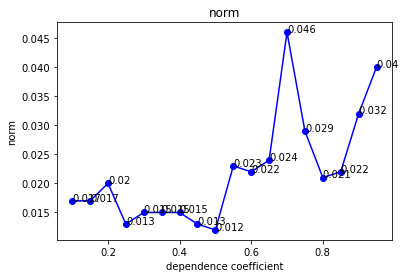

In [42]:
plot_cor(cor_n, 'norm')

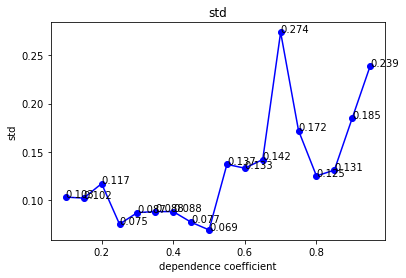

In [43]:
plot_cor(cor_s, 'std')

In [44]:
cor_n = []
cor_s = []
for s in tqdm(np.arange(0.1, 1, 0.05)):
    df = stationary_pb_ts(t_time = 300, d = s, mode = "case2", a=0.5)
    _, kernel_dict = compute_kernel(df)
    k_list = list(kernel_dict.values())
    cor_n.append(dHcor2_norm(k_list))
    cor_s.append(dHcor2_std(k_list))

  0%|          | 0/18 [00:00<?, ?it/s]

In [45]:
cor_n = [ round(elem, 3) for elem in cor_n ]
cor_s = [ round(elem, 3) for elem in cor_s ]

In [46]:
np.array(cor_s)/ np.array(cor_n)

array([5.77777778, 5.84210526, 6.15      , 5.8372093 , 5.81818182,
       5.75757576, 6.        , 5.94117647, 6.09876543, 6.00746269,
       5.76851852, 5.90666667, 5.88125   , 6.07894737, 6.02424242,
       5.93236715, 5.95522388, 6.07142857])

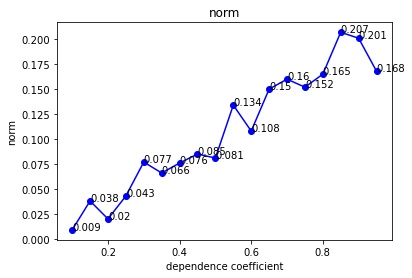

In [47]:
plot_cor(cor_n, 'norm')

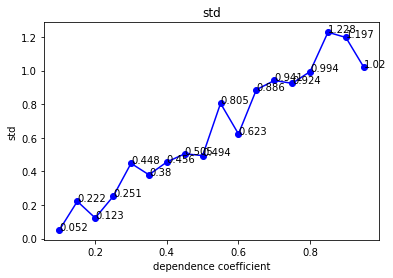

In [48]:
plot_cor(cor_s, 'std')

In [50]:
np.array(cor_s)/ np.array(cor_n)

array([5.77777778, 5.84210526, 6.15      , 5.8372093 , 5.81818182,
       5.75757576, 6.        , 5.94117647, 6.09876543, 6.00746269,
       5.76851852, 5.90666667, 5.88125   , 6.07894737, 6.02424242,
       5.93236715, 5.95522388, 6.07142857])